In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from results import *

# Extract results
base_dirs = {
    'ctc': "decoder_results/ctc_final_results",
    'rnnt': "decoder_results/rnnt_results",
}
results = process_result_directories(base_dirs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Processing  mea_final_results_shuffle
Processing  MEA
Processing  ecog_final_results_shuffle
Processing  mea_final_results
Processing  EMG
Processing  emg_final_results_shuffle
Processing  ECoG
Processing  emg_streaming_final_result_shuffle
Processing  emg_streaming_final_result
Processing  emg_final_result
Processing  ECoG_tm1k_f22
Processing  mea_final_result_shuffle
Processing  chance_ECoG_tm1k_f22
Processing  mea_streaming_final_result_shuffle
Processing  mea_final_result
Processing  mea_streaming_final_result
Processing  chance_emg_final_result


In [5]:
from metric_utils import *

# Define comparison sets to generate sentence error rates for
comparison_sets = [
    ('gt_text', 'asr_transcript'),
    ('gt_text', 'asr_transcript_streaming'),
]

# generate error rates
max_pred_words = 999
g2p_names = [
"rnnt_emg_final_result gt_text_vs_asr_transcript", "rnnt_chance_emg_final_result gt_text_vs_asr_transcript",
"rnnt_mea_final_result gt_text_vs_asr_transcript", "rnnt_mea_final_result_shuffle gt_text_vs_asr_transcript",
"rnnt_chance_ecog_tm1k_f22 gt_text_vs_asr_transcript", "rnnt_ecog_tm1k_f22 gt_text_vs_asr_transcript",
"ctc_mri gt_text_vs_asr_transcript", "ctc_ema gt_text_vs_asr_transcript", "ctc_emg gt_text_vs_asr_transcript",
"ctc_mea_final_results_shuffle gt_text_vs_asr_transcript", "ctc_mea_final_results gt_text_vs_asr_transcript",
"ctc_ecog gt_text_vs_asr_transcript", "ctc_ecog_final_results_shuffle gt_text_vs_asr_transcript",
"ctc_emg_final_results_shuffle gt_text_vs_asr_transcript", "rnnt_mea_streaming_final_result gt_text_vs_asr_transcript",
"rnnt_mea_streaming_final_result_shuffle gt_text_vs_asr_transcript", "rnnt_emg_streaming_final_result_shuffle gt_text_vs_asr_transcript",
"rnnt_emg_streaming_final_result gt_text_vs_asr_transcript", "rnnt_ecog_tm1k_f22 gt_text_vs_asr_transcript_streaming", 
"rnnt_chance_ecog_tm1k_f22 gt_text_vs_asr_transcript_streaming",
]
results_summary = calculate_error_rates_and_summarize(comparison_sets, results, g2p_names=g2p_names, N=10, max_pred_words=max_pred_words)
cached_accuracy_results_summary = results_summary

ctc_mea_final_results_shuffle gt_text_vs_asr_transcript
ctc_mea gt_text_vs_asr_transcript
ctc_ecog_final_results_shuffle gt_text_vs_asr_transcript
ctc_mea_final_results gt_text_vs_asr_transcript
ctc_emg gt_text_vs_asr_transcript
ctc_emg_final_results_shuffle gt_text_vs_asr_transcript
ctc_ecog gt_text_vs_asr_transcript
rnnt_emg_streaming_final_result_shuffle gt_text_vs_asr_transcript
rnnt_emg_streaming_final_result gt_text_vs_asr_transcript
rnnt_emg_final_result gt_text_vs_asr_transcript
rnnt_ecog_tm1k_f22 gt_text_vs_asr_transcript
rnnt_ecog_tm1k_f22 gt_text_vs_asr_transcript_streaming
rnnt_mea_final_result_shuffle gt_text_vs_asr_transcript
rnnt_chance_ecog_tm1k_f22 gt_text_vs_asr_transcript
rnnt_chance_ecog_tm1k_f22 gt_text_vs_asr_transcript_streaming
rnnt_mea_streaming_final_result_shuffle gt_text_vs_asr_transcript
rnnt_mea_final_result gt_text_vs_asr_transcript
rnnt_mea_streaming_final_result gt_text_vs_asr_transcript
rnnt_chance_emg_final_result gt_text_vs_asr_transcript


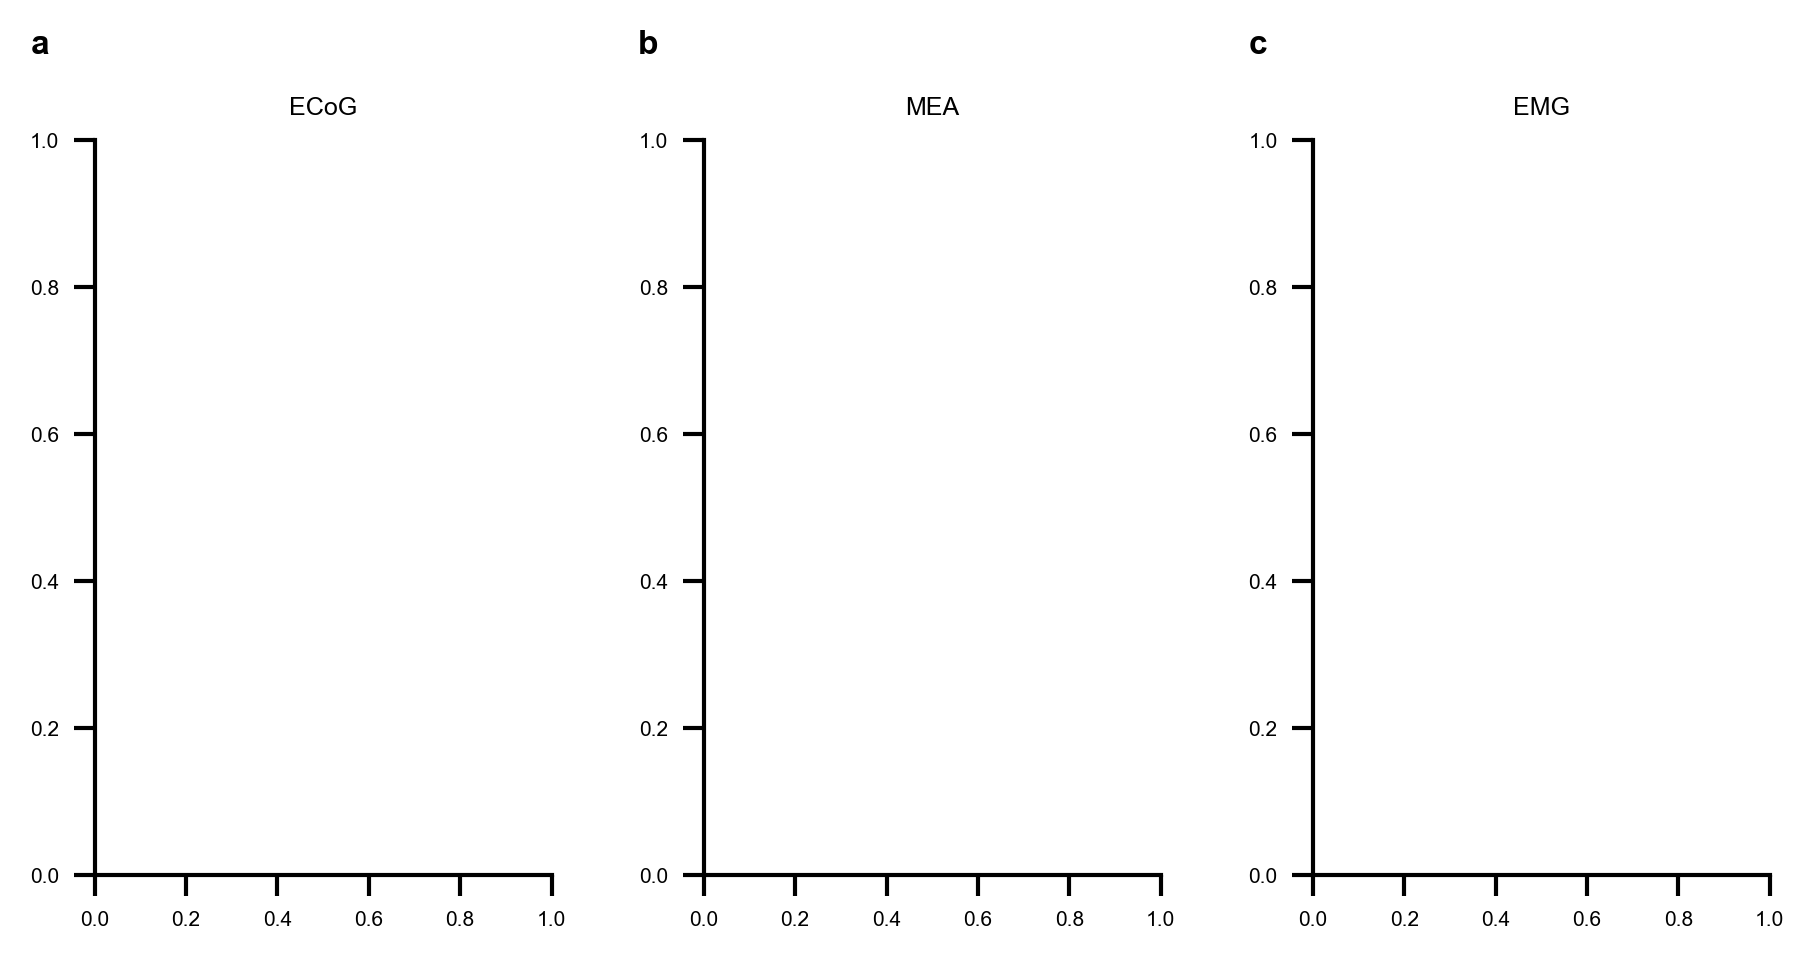

In [6]:
from results import *
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

# plotting defaults
plotting_defaults(fontsize=5)
width_in_inches = 183 / 25.4 
height_in_inches = 170 / 25.4

# p_value dictionary
stats_dict = {}

# initialize plot
fig4 = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=300)
plt.rcParams['ytick.left'] = True

# Create a GridSpec layout with more specific positions and spanning, adjusted for the new size
fig4_gs = GridSpec(8, 6, hspace=0.6, wspace=1.0)
titles = [
    "ECoG", "MEA", "EMG"
]

# Adjust positions according to the new GridSpec definition
positions = [
    (fig4_gs[:4, :2]), (fig4_gs[:4, 2:4]), (fig4_gs[:4, 4:]),
]
panel_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

# Create a dictionary to store the axes with the corrected setup
fig4_axes = create_custom_subplots(fig4, positions, titles, panel_letters)
plt.show()

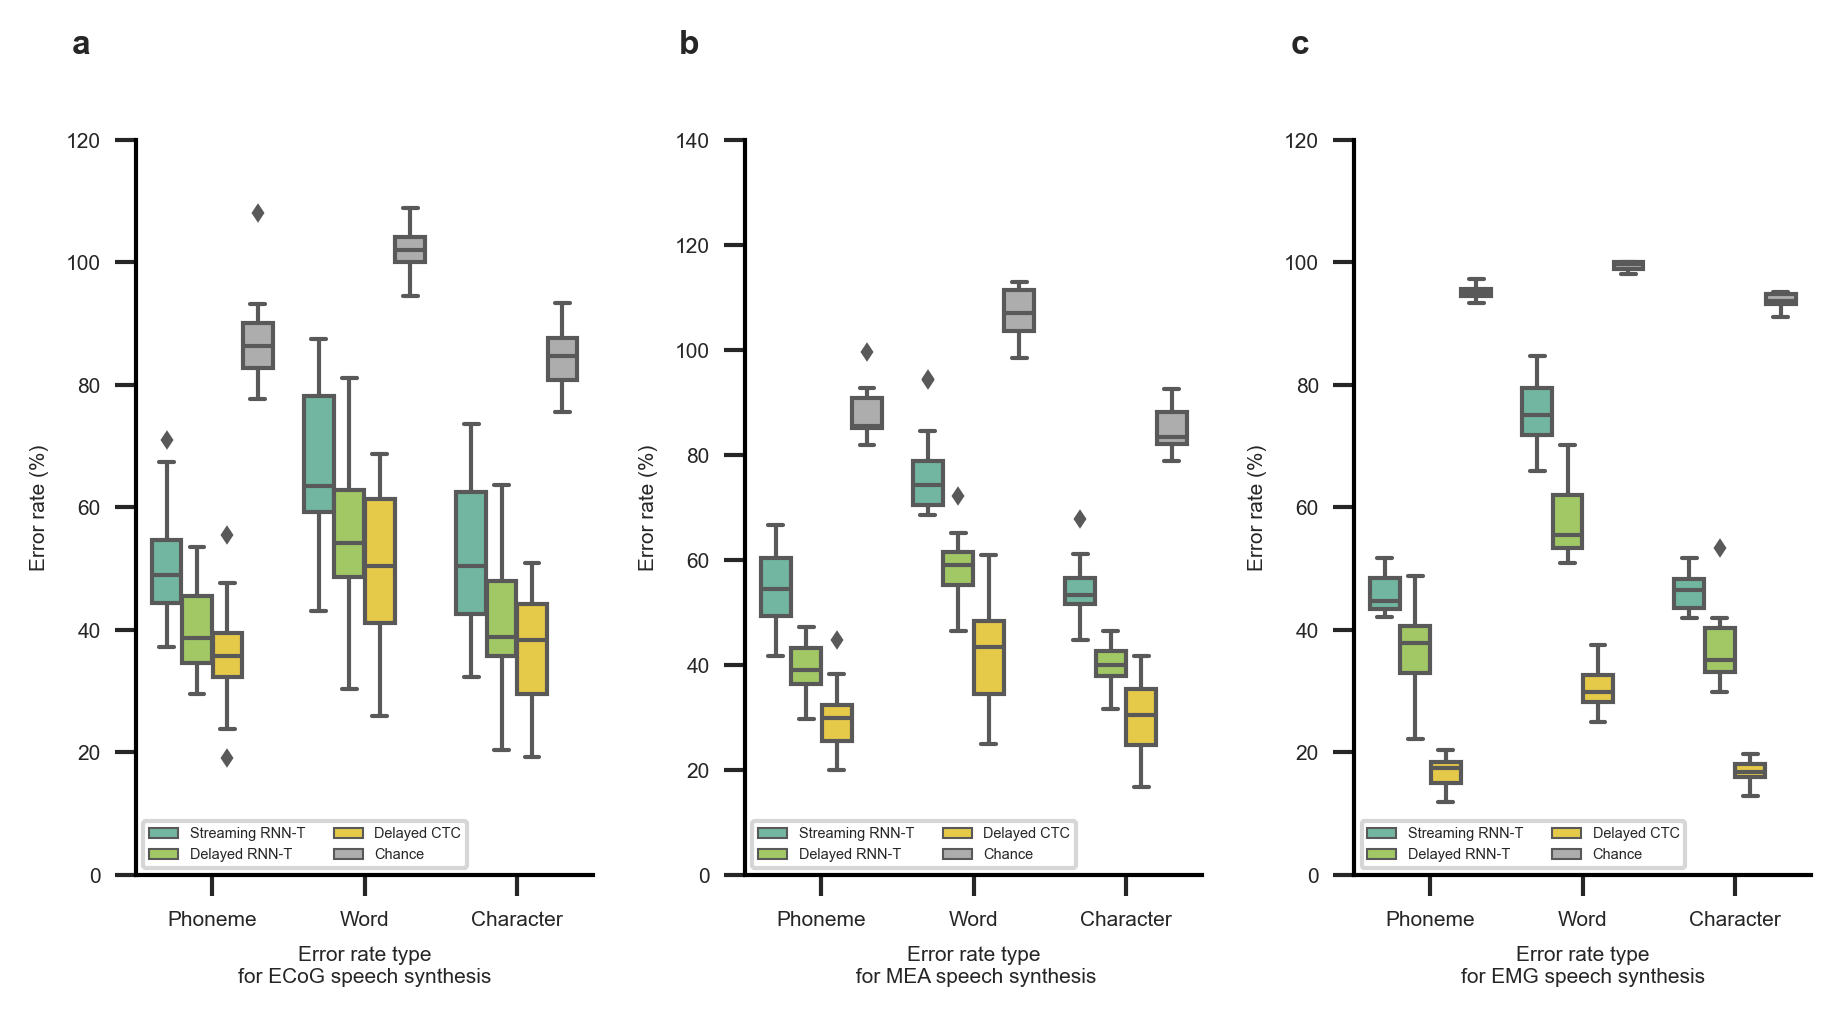

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import scipy.stats as stats
from results import *

display_values = False

# Multimodal plot
specified_comparisons = [
    
    # RNN-T streaming
    "rnnt_ecog_tm1k_f22 gt_text_vs_asr_transcript_streaming", 
    "rnnt_mea_streaming_final_result gt_text_vs_asr_transcript",
    "rnnt_emg_streaming_final_result gt_text_vs_asr_transcript", 
    
    # RNN-T bidirectional
    "rnnt_ecog_tm1k_f22 gt_text_vs_asr_transcript",
    "rnnt_mea_final_result gt_text_vs_asr_transcript",
    "rnnt_emg_final_result gt_text_vs_asr_transcript",

    # CTC
    "ctc_ecog gt_text_vs_asr_transcript",
    "ctc_ecog_final_results_shuffle gt_text_vs_asr_transcript",
    "ctc_mea_final_results gt_text_vs_asr_transcript",
    "ctc_mea_final_results_shuffle gt_text_vs_asr_transcript",
    "ctc_emg gt_text_vs_asr_transcript",
    "ctc_emg_final_results_shuffle gt_text_vs_asr_transcript",
]

# Updated data preparation with simplified modality labels
data = {'Modality': [], 'Error Rate': [], 'Activity': [], 'Metric': []}
for modality in specified_comparisons:
    metrics = results_summary[modality]
    if 'ema' in modality:
        modality_name = "EMA"
    if 'mea' in modality:
        modality_name = 'MEA'
    if 'ecog' in modality:
        modality_name = 'ECoG'
    if 'emg' in modality:
        modality_name = 'EMG'
    if 'chance' in modality or 'shuffle' in modality:
        activity_type = 'Chance'
    elif 'streaming' in modality:
        activity_type = "Streaming RNN-T"
    elif 'ctc' in modality:
        activity_type = "Delayed CTC"
    else:
        activity_type = 'Delayed RNN-T'
        
    for metric in ['wers', 'cers', 'pers']:
        data['Modality'].append(modality_name)
        data['Error Rate'].append(np.array(metrics[metric]) * 100) # Convert to percentage
        data['Activity'].append(activity_type)
        data['Metric'].append(metric.upper()[:3])
    for met in ['pers', 'wers', 'cers']:
        bootstrapped_data = get_bootstrapped_accuracies(metrics[met], median=True, num_repeats=1000)
        confidence_interval = (np.percentile(bootstrapped_data,0.5).round(decimals=5), np.percentile(bootstrapped_data,99.5).round(decimals=5))
        
# ECoG error rate panel
df = pd.DataFrame(data)
df = df.explode('Error Rate')
df['Error Rate'] = pd.to_numeric(df['Error Rate'])
sns.set_style("white")
color_set = "Set2"
palette = [sns.color_palette(color_set)[0], sns.color_palette(color_set)[4], sns.color_palette(color_set)[5], sns.color_palette("Greys_r")[3]]
modality_order = ['Streaming RNN-T', 'Delayed RNN-T', 'Delayed CTC', 'Chance']
condition_order = ['PER', 'WER', 'CER']
x_labels = ['Phoneme', 'Word', 'Character']
flierprops = dict(markersize=2)
ax = fig4_axes['a'] 
ax.cla()
ax.text(-0.1, 1.15, f"a", transform=ax.transAxes, fontsize=8, va='top', ha='right', fontdict={'weight': 'bold'})
sns.boxplot(x='Metric', y='Error Rate', hue='Activity', hue_order=modality_order, order=condition_order, data=df[df['Modality'] == 'ECoG'], ax=ax, palette=palette, flierprops=flierprops)
ax.set_ylim(0, 120)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='lower left', fontsize='x-small', ncols=2)
ax.set_ylabel('Error rate (%)')
ax.set_xlabel('Error rate type\nfor ECoG speech synthesis')
ax.set_xticklabels(x_labels)

# MEA error rate panel
df = pd.DataFrame(data)
df = df.explode('Error Rate')
df['Error Rate'] = pd.to_numeric(df['Error Rate'])
sns.set_style("white")
color_set = "Set2"
palette = [sns.color_palette(color_set)[0], sns.color_palette(color_set)[4], sns.color_palette(color_set)[5], sns.color_palette("Greys_r")[3]]
modality_order = ['Streaming RNN-T', 'Delayed RNN-T', 'Delayed CTC', 'Chance']
condition_order = ['PER', 'WER', 'CER']
x_labels = ['Phoneme', 'Word', 'Character']
flierprops = dict(markersize=2)
ax = fig4_axes['b'] 
ax.cla()
ax.text(-0.1, 1.15, f"b", transform=ax.transAxes, fontsize=8, va='top', ha='right', fontdict={'weight': 'bold'})
sns.boxplot(x='Metric', y='Error Rate', hue='Activity', hue_order=modality_order, order=condition_order, data=df[df['Modality'] == 'MEA'], ax=ax, palette=palette, flierprops=flierprops)
ax.set_ylim(0, 140)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='lower left', fontsize='x-small', ncols=2)
ax.set_ylabel('Error rate (%)')
ax.set_xlabel('Error rate type\n for MEA speech synthesis')
ax.set_xticklabels(x_labels)

# EMG error rate panel
df = pd.DataFrame(data)
df = df.explode('Error Rate')
df['Error Rate'] = pd.to_numeric(df['Error Rate'])
sns.set_style("white")
color_set = "Set2"
palette = [sns.color_palette(color_set)[0], sns.color_palette(color_set)[4], sns.color_palette(color_set)[5], sns.color_palette("Greys_r")[3]]
modality_order = ['Streaming RNN-T', 'Delayed RNN-T', 'Delayed CTC', 'Chance']
condition_order = ['PER', 'WER', 'CER']
x_labels = ['Phoneme', 'Word', 'Character']
flierprops = dict(markersize=2)
ax = fig4_axes['c'] 
ax.cla()
ax.text(-0.1, 1.15, f"c", transform=ax.transAxes, fontsize=8, va='top', ha='right', fontdict={'weight': 'bold'})
sns.boxplot(x='Metric', y='Error Rate', hue='Activity', hue_order=modality_order, order=condition_order, data=df[df['Modality'] == 'EMG'], ax=ax, palette=palette, flierprops=flierprops)
ax.set_ylim(0, 120)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='lower left', fontsize='x-small', ncols=2)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=5, ncol=1, title='Decoding\narchitecture')
ax.set_ylabel('Error rate (%)')
ax.set_xlabel('Error rate type\nfor EMG speech synthesis')
ax.set_xticklabels(x_labels)
ax.tick_params(axis='x', which='both', length=5, width=1, direction='out')  # Adjust prong size and direction
display(fig4)